In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [35]:
bridge_his = np.loadtxt('510_long.txt')
bridge_his = np.loadtxt('his2a.dat',skiprows=1)

In [36]:
bridge_N = bridge_his[:,0]
bridge_U = bridge_his[:,1]

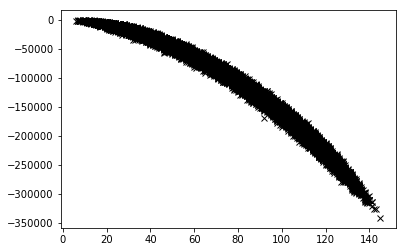

In [37]:
plt.plot(bridge_N,bridge_U,'kx')

In [38]:
N_min = bridge_N.min()
N_max = bridge_N.max()
U_min = bridge_U.min()
U_max = bridge_U.max()

In [39]:
bins_N = np.linspace(N_min,N_max,100)
bins_U = np.linspace(U_min,U_max,100)

In [40]:
#hist_N = np.zeros(len(bins_N))
#hist_U = np.zeros(len(bins_U))
#hist_NU = np.zeros([len(bins_N),len(bins_U)])

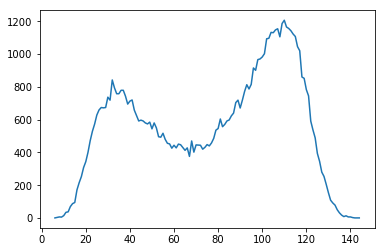

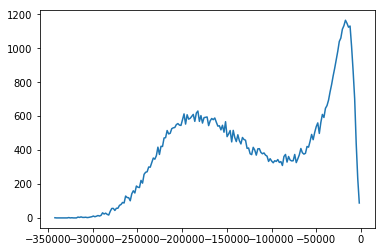

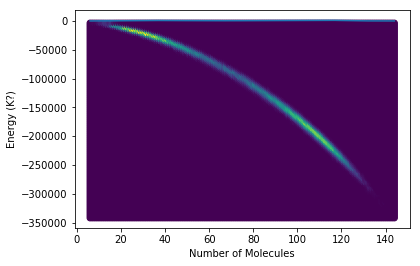

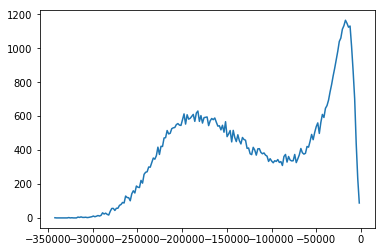

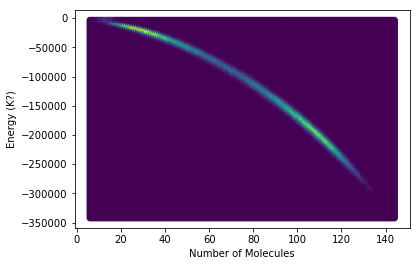

In [41]:
hist_N = np.histogram(bridge_N,np.linspace(N_min,N_max,N_max-N_min+1))
#print(hist_N[0])
#print(hist_N[1])
#print(len(hist_N[0]))
#print(len(hist_N[1]))
plt.plot(hist_N[1][:-1],hist_N[0])
plt.show()
hist_U = np.histogram(bridge_U,np.linspace(U_min,U_max,200))
#print(hist_U)
plt.plot(hist_U[1][:-1],hist_U[0])
plt.show()
hist_NU = np.histogram2d(bridge_N,bridge_U,[np.linspace(N_min,N_max,N_max-N_min+1),np.linspace(U_min,U_max,100)])
#print(hist_NU[0].shape, len(hist_NU[0]))
#print(hist_NU[1].shape, len(hist_NU[1]))
#print(hist_NU[2].shape, len(hist_NU[2]))
#print(len(hist_NU[0].reshape(131*99)))
#print(hist_NU[2].shape)
hist_N_plot = np.zeros(hist_NU[0].shape[0]*hist_NU[0].shape[1])
hist_U_plot = np.zeros(hist_NU[0].shape[0]*hist_NU[0].shape[1])

i_NU = 0

for i_N, N_i in enumerate(hist_NU[1][:-1]):
    for i_U, U_i in enumerate(hist_NU[2][:-1]):
        hist_N_plot[i_NU] = N_i
        hist_U_plot[i_NU] = U_i
        i_NU += 1

hist_NU_plot = hist_NU[0].reshape(hist_NU[0].shape[0]*hist_NU[0].shape[1])        
    
#plt.plot(hist_N_plot,hist_U_plot,hist_NU[0].reshape(131*99))
plt.scatter(hist_N_plot,hist_U_plot,c=hist_NU_plot)
plt.xlabel('Number of Molecules')
plt.ylabel('Energy (K?)')

hist_N = np.histogram(bridge_N,np.linspace(N_min,N_max,N_max-N_min+1))
#print(hist_N[0])
#print(hist_N[1])
#print(len(hist_N[0]))
#print(len(hist_N[1]))
plt.plot(hist_N[1][:-1],hist_N[0])
plt.show()
hist_U = np.histogram(bridge_U,np.linspace(U_min,U_max,200))
#print(hist_U)
plt.plot(hist_U[1][:-1],hist_U[0])
plt.show()
hist_NU = np.histogram2d(bridge_N,bridge_U,[np.linspace(N_min,N_max,N_max-N_min+1),np.linspace(U_min,U_max,100)])
#print(hist_NU[0].shape, len(hist_NU[0]))
#print(hist_NU[1].shape, len(hist_NU[1]))
#print(hist_NU[2].shape, len(hist_NU[2]))
#print(len(hist_NU[0].reshape(131*99)))
#print(hist_NU[2].shape)
hist_N_plot = np.zeros(hist_NU[0].shape[0]*hist_NU[0].shape[1])
hist_U_plot = np.zeros(hist_NU[0].shape[0]*hist_NU[0].shape[1])

i_NU = 0

for i_N, N_i in enumerate(hist_NU[1][:-1]):
    for i_U, U_i in enumerate(hist_NU[2][:-1]):
        hist_N_plot[i_NU] = N_i
        hist_U_plot[i_NU] = U_i
        i_NU += 1

hist_NU_plot = hist_NU[0].reshape(hist_NU[0].shape[0]*hist_NU[0].shape[1])        
    
#plt.plot(hist_N_plot,hist_U_plot,hist_NU[0].reshape(131*99))
plt.scatter(hist_N_plot,hist_U_plot,c=hist_NU_plot)
plt.xlabel('Number of Molecules')
plt.ylabel('Energy (K?)')

In [42]:
mu_sim = -4140 #[units?]
mu_sim = -4127 # For the new 510 run
Temp_sim = 510 #[K]

In [43]:
mu_new = -4127
Temp_new = 510 #[K]

#mu_new = -4091
#Temp_new = 500 #[K]
#
#mu_new = -4056
#Temp_new = 490 #[K]
#
#mu_new = -4023 # Using his2a (original, short 510 run)
#mu_new = -4024 # Using 510_long
#mu_new = -4023 # Using 510 with 4127 mu
#mu_new = -6017 # Just testing robustness
#Temp_new = 480 #[K]

76000.0
76000


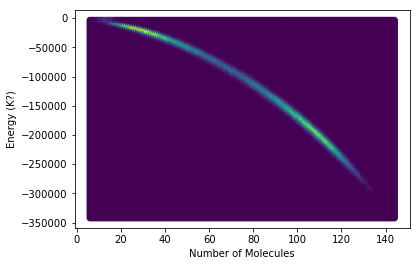

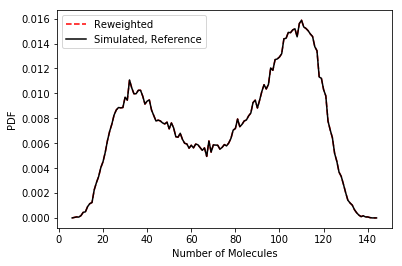

In [50]:
hist_N_new = np.zeros(len(hist_N[0]))
hist_U_new = np.zeros(len(hist_U[0]))
hist_NU_new = np.zeros(len(hist_NU_plot))

beta_i = 1./Temp_sim #[Assuming U and mu are in K]
K_i = np.sum(hist_NU_plot)
print(K_i)
K_i = len(bridge_N)
print(K_i)
mu_i = mu_sim

beta = 1./Temp_new
mu = mu_new
    
i_NU = 0

for i_N, N in enumerate(hist_NU[1][:-1]):
    for i_U, U in enumerate(hist_NU[2][:-1]):
        
        if hist_NU_plot[i_NU] > 0:

            denominator = K_i * np.exp(-beta_i * U + beta_i * mu_i * N)
            numerator = hist_NU_plot[i_NU]*np.exp(-beta * U + beta* mu * N)

            hist_NU_new[i_NU] = numerator/denominator
        
        hist_N_new[i_N] += hist_NU_new[i_NU]
        hist_U_new[i_U] += hist_NU_new[i_NU]
        i_NU += 1       
        
plt.scatter(hist_N_plot,hist_U_plot,c=hist_NU_new)
plt.xlabel('Number of Molecules')
plt.ylabel('Energy (K?)')
plt.show()

hist_new_sim_data = np.loadtxt(str(Temp_new)+'.txt')
hist_new_sim_N = np.histogram(hist_new_sim_data,np.linspace(N_min,N_max,N_max-N_min+1))

#print(hist_NU_plot-hist_NU_new)
#print(np.sum(hist_N[0]))
#print(np.sum(hist_N_new))
#print(hist_N_new)
#print(hist_N[0]/np.sum(hist_N[0]))
#print(hist_NU[1][:-1].shape)
plt.plot(hist_NU[1][:-1],hist_N_new/np.sum(hist_N_new),'r--',label='Reweighted')
plt.plot(hist_NU[1][:-1],hist_N[0]/np.sum(hist_N[0]),'k-',label='Simulated, Reference')
#plt.plot(hist_NU[1][:-1],hist_new_sim_N[0]/np.sum(hist_new_sim_N[0]),'b:',label='Resimulated')
plt.xlabel('Number of Molecules')
plt.ylabel('PDF')
plt.legend()
plt.show()

In [45]:
N_cut = 70

hist_Ni = hist_NU[1][:-1]


vapor_sum = np.sum(hist_N_new[hist_Ni<=N_cut])
liq_sum = np.sum(hist_N_new[hist_Ni>N_cut])

print(vapor_sum)
print(liq_sum)

print(liq_sum-vapor_sum)

0.401355263158
0.598644736842
0.197289473684


In [46]:
def double_gaussian( x, params ):
    (c1, mu1, sigma1, c2, mu2, sigma2) = params
    res =   c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) ) \
          + c2 * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) )
    return res

from scipy.optimize import minimize

SSE = lambda params: np.sum((double_gaussian(hist_Ni,params) - hist_N_new)**2)

guess = [1,30,3,1,100,3]

opt = minimize(SSE,guess)

hist_N_fit = double_gaussian(hist_Ni,opt.x)

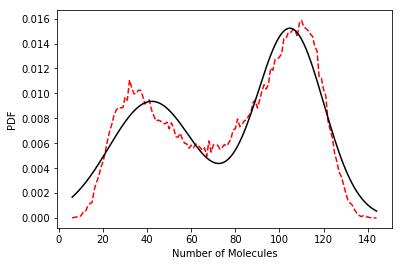

In [47]:
plt.plot(hist_Ni,hist_N_new,'r--',label='Reweighted')
plt.plot(hist_Ni,hist_N_fit,'k-',label='Double Gaussian Fit')
plt.xlabel('Number of Molecules')
plt.ylabel('PDF')
plt.show()

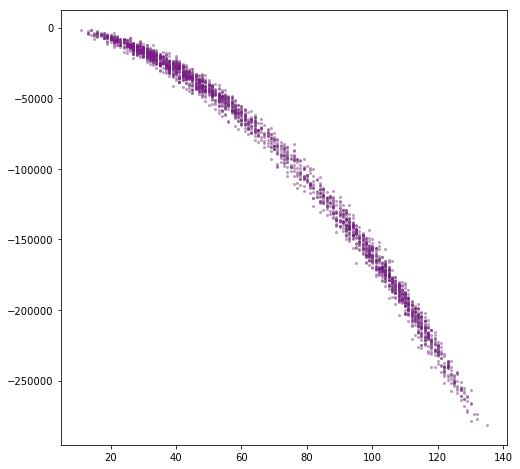

In [48]:
Temp_range = [480, 490, 500, 510]

color_scheme = ['r','b','g','m']
shape_scheme = ['o','o','o','o']

fig = plt.figure(figsize=(8,8))

for iTemp, Temp in enumerate(Temp_range):
    
    new_sim_data = np.loadtxt(str(Temp_new)+'.txt')
    new_sim_N = new_sim_data[:,0]
    new_sim_U = new_sim_data[:,1]
    
    plt.plot(new_sim_N,new_sim_U,color_scheme[iTemp]+shape_scheme[iTemp],alpha=0.1,markersize=2)
    
plt.show()

### They sample all the same energies/densities (this makes sense), it is just the relative amounts that are different, i.e. the histograms


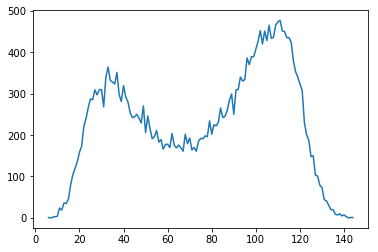

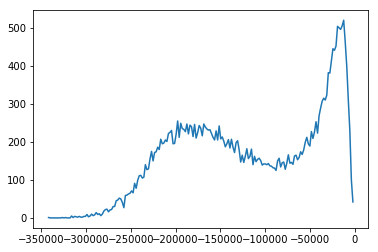

In [49]:
long_bridge_data = np.loadtxt('510_long.txt')
long_bridge_N = long_bridge_data[:,0]
long_bridge_U = long_bridge_data[:,1]

N_min = long_bridge_N.min()
N_max = long_bridge_N.max()
U_min = long_bridge_U.min()
U_max = long_bridge_U.max()

hist_N_long = np.histogram(long_bridge_N,np.linspace(N_min,N_max,N_max-N_min+1))
plt.plot(hist_N_long[1][:-1],hist_N_long[0])
plt.show()

hist_U_long = np.histogram(long_bridge_U,np.linspace(U_min,U_max,200))
#print(hist_U)
plt.plot(hist_U_long[1][:-1],hist_U_long[0])
plt.show()